In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
nek21_trans_df = pd.read_csv('results/nek21_trans_df.csv')
# mag21_trans_df = pd.read_csv('results/mag21_trans_df.csv')
nek21_chat_df = pd.read_csv('results/nek21_chat_df.csv')
perf_df = pd.read_csv('perf21.csv')
df21 = nek21_trans_df

In [35]:
def transition_matrix(transitions):
    print(transitions)
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [36]:
def trans_wrapper(df, normalized=True):
    transitions = df['labels_h'].copy()

    states = sorted(set(transitions))

    ids = {k: 0 + i for i, k in enumerate(states)}
    transitions = transitions.map(ids)

    counts = transitions.value_counts().sort_index()
    frequencies = counts/counts.sum()

    transition = np.array(transition_matrix(transitions))
    f = np.array(frequencies)[None,:]
    if(normalized):
        transition = transition/f

    # b = transition

    return transition

In [64]:
state = ["s", "d", "b", "f", "q"]
session_mats = [trans_wrapper(df21[df21['session'] == session]) for session in range(1,19)]
session_mats

15514    4
15515    4
15516    4
15517    3
15518    4
        ..
17794    4
17795    4
17796    4
17797    4
17798    4
Name: labels_h, Length: 2285, dtype: int64
20093    4
20094    4
20095    4
20096    3
20097    4
        ..
20799    4
20800    3
20801    4
20802    3
20803    4
Name: labels_h, Length: 711, dtype: int64
0       4
1       4
2       4
3       4
4       4
       ..
3937    4
3938    4
3939    4
3940    4
3941    3
Name: labels_h, Length: 3942, dtype: int64
5724    4
5725    4
5726    4
5727    4
5728    4
       ..
6728    4
6729    4
6730    4
6731    3
6732    4
Name: labels_h, Length: 1009, dtype: int64
18364    4
18365    4
18366    4
18367    4
18368    3
        ..
19555    4
19556    4
19557    4
19558    4
19559    4
Name: labels_h, Length: 1196, dtype: int64
11569    4
11570    4
11571    2
11572    3
11573    4
        ..
12900    4
12901    4
12902    4
12903    3
12904    4
Name: labels_h, Length: 1336, dtype: int64
9612     4
9613     3
9614     0
9615  

[array([[3.54080579, 0.        , 0.        , 1.1049323 , 0.92949559],
        [0.        , 5.1814059 , 6.04497354, 0.9260385 , 0.94234576],
        [0.        , 0.        , 0.        , 1.08037825, 1.02610983],
        [1.43641199, 1.62056738, 0.54018913, 0.879244  , 1.01893642],
        [0.84002941, 0.81717147, 1.10003851, 1.03075949, 0.99689402]]),
 array([[ 0.        ,  0.        ,  0.        ,  1.87722772,  0.88976109],
        [ 0.        , 79.        ,  0.        ,  0.        ,  0.80887372],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.21331058],
        [ 2.81584158,  0.        ,  0.        ,  0.90608764,  0.98506404],
        [ 0.72923077,  0.81025641,  1.21538462,  1.01081493,  1.00383303]]),
 array([[0.        , 0.        , 0.        , 0.82984482, 1.10615257],
        [7.24632353, 0.        , 0.        , 1.51150307, 0.69646643],
        [2.31882353, 0.        , 0.        , 1.28981595, 0.89147703],
        [1.780059  , 1.51305015, 1.45252815, 0.82511256, 1.03

In [6]:
# from numpy import array
# nek19=[array([[0.        , 0.99539675, 0.94986021, 1.422338  ],
#         [1.8944485 , 0.7341051 , 1.13361292, 0.80006513],
#         [0.76893445, 1.12041248, 0.95668825, 0.97456493],
#         [0.23705633, 1.00579045, 0.91407469, 1.54991049]]),
#  array([[5.11654527, 0.80631105, 0.94810807, 1.05215856],
#         [1.7278094 , 0.61458319, 1.22040208, 0.72837338],
#         [0.61412951, 1.19152558, 0.92926252, 0.9557755 ],
#         [0.52607928, 1.01261666, 0.84294771, 1.78500532]]),
#  array([[0.        , 0.68701095, 1.11280101, 1.20936639],
#         [2.97704747, 0.85150654, 0.99525161, 0.98793311],
#         [0.37093367, 1.13631089, 0.98692333, 0.91047356],
#         [0.40648148, 0.68701095, 1.05716096, 1.39077135]]),
#  array([[0.        , 1.29042904, 0.97711831, 0.58974359],
#         [1.48895659, 0.90074502, 1.05330452, 0.76856436],
#         [0.93735668, 1.03470378, 0.98593125, 1.01676829],
#         [0.29487179, 0.96782178, 0.94568528, 1.69117647]])]
# session_mats = session_mats + nek19
# perf19_df = pd.read_csv('data/Project_RED/calculated performance data/NEKMTSCalcs.csv')
# perf19 = perf19_df['MTSPerf']

In [65]:
from scipy.stats import pearsonr, zscore

# perfs = (perf_df['perf']-perf_df['perf'].min())/perf_df['perf'].max()
perfs = zscore(perf_df['perf'])
# perfs = perfs.append(perf19[0:4]).reset_index(drop=True)
print((perfs))

corrs = np.zeros((len(state), len(state)))

0    -0.306000
1     0.057490
2    -0.436799
3     1.365479
4     2.705265
5    -0.093542
6    -0.949155
7    -0.949155
8    -0.948433
9     0.106630
10   -0.949155
11    0.263445
12    0.923943
13    0.702813
14   -0.693339
15   -0.949155
16   -0.949155
17    1.098823
Name: perf, dtype: float64


[21, 20, 19, 18, 12, 11]

In [66]:
for i in range(0,5):
    for j in range(0,5):
        l = []
        for m in session_mats:
            try:
                l = l + [m[i][j]]
            except:
                l =l + [0]
        # print((l))
        corr, pval = pearsonr(l,perfs)
        corrs[i][j] = corr
        print("from: {}\tto: {}\tcorr: {}".format(state[i], state[j], corr))
        
corrs

from: s	to: s	corr: -0.22507939865295587
from: s	to: d	corr: 0.06389469060387852
from: s	to: b	corr: -0.032495879529461605
from: s	to: f	corr: -0.20555304041725497
from: s	to: q	corr: -0.05218493358618349
from: d	to: s	corr: -0.25833205336942666
from: d	to: d	corr: 0.19333499799500922
from: d	to: b	corr: -0.06775542159846706
from: d	to: f	corr: -0.11247368258456153
from: d	to: q	corr: -0.04208888241433437
from: b	to: s	corr: 0.29997286214260455
from: b	to: d	corr: 0.06389469060387852
from: b	to: b	corr: 0.6884035485506045
from: b	to: f	corr: -0.2603258817131479
from: b	to: q	corr: -0.04763404041327407
from: f	to: s	corr: -0.18776690841991972
from: f	to: d	corr: 0.09013278069944426
from: f	to: b	corr: -0.047898156801081865
from: f	to: f	corr: 0.38590540830265874
from: f	to: q	corr: -0.23607885364091868
from: q	to: s	corr: -0.07061158164038299
from: q	to: d	corr: -0.27650480242035474
from: q	to: b	corr: -0.1476342603684647
from: q	to: f	corr: -0.23486137879407246
from: q	to: q	corr: -0.2

array([[-0.2250794 ,  0.06389469, -0.03249588, -0.20555304, -0.05218493],
       [-0.25833205,  0.193335  , -0.06775542, -0.11247368, -0.04208888],
       [ 0.29997286,  0.06389469,  0.68840355, -0.26032588, -0.04763404],
       [-0.18776691,  0.09013278, -0.04789816,  0.38590541, -0.23607885],
       [-0.07061158, -0.2765048 , -0.14763426, -0.23486138, -0.20361812]])

In [18]:
high_perfs = perfs > 0.5

In [19]:
low_perfs = perfs < 0.5

[Text(50.722222222222214, 0.5, 'from'), Text(0.5, 23.52222222222222, 'to')]

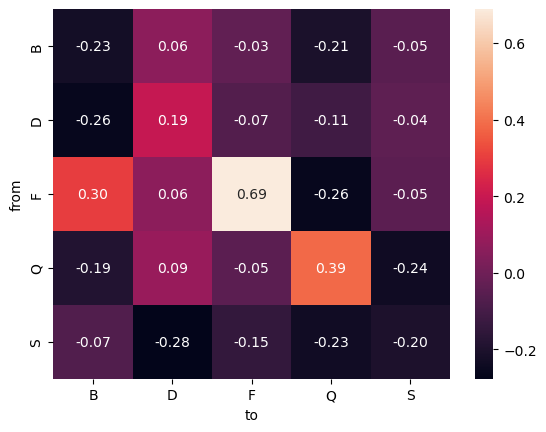

In [67]:
states = state
states = sorted(states)
state_names = [s[0].upper() for s in states]
hm = sns.heatmap(corrs, fmt='.2f',annot=True, xticklabels=(state_names), yticklabels=(state_names))
hm.set(ylabel='from', xlabel='to')


In [49]:
states = state
states = sorted(states)
state_names = [s[0].upper() for s in states]

hm = sns.heatmap(corrs, fmt='.2f',annot=True, xticklabels=(state_names), yticklabels=(state_names))
hm.set(ylabel='from', xlabel='to')

In [ ]:
# High performance

    transitions = data.copy()

    # print(transitions[0:10])
    states = set(transitions)
    states = sorted(states)
    state_names = [s[0].upper() for s in states]

    ids = {k: 0 + i for i, k in enumerate(states)}
    transitions = transitions.map(ids)
    # print(transitions[0:10])

    counts = transitions.value_counts().sort_index()
    frequencies = counts/counts.sum()
    # print(counts)
    # print(frequencies)

    transition = np.array(transition_matrix(transitions))

    ax1 = sns.heatmap(transition, square=True, annot=True,fmt=".2f",linewidth=.5,cmap="mako_r",ax=axes[0])
    ax1.set_xticklabels(state_names)
    ax1.set_yticklabels(state_names)
    ax1.set_title(title + " transition")

    normalized = (transition/np.array(frequencies)[None,:])

    ax2 = sns.heatmap(normalized, square=True, annot=True,fmt=".2f",linewidth=.5,cmap="mako_r",ax=axes[1])
    ax2.set_xticklabels(state_names)
    ax2.set_yticklabels(state_names)
    ax2.set_title(title + " normalized")
    plt.show()
    if(verbose):
        print(ids)
        print(normalized)
        print(transition)

heatmaps(nek21_trans_df['labels_h'].copy(), title="trans")

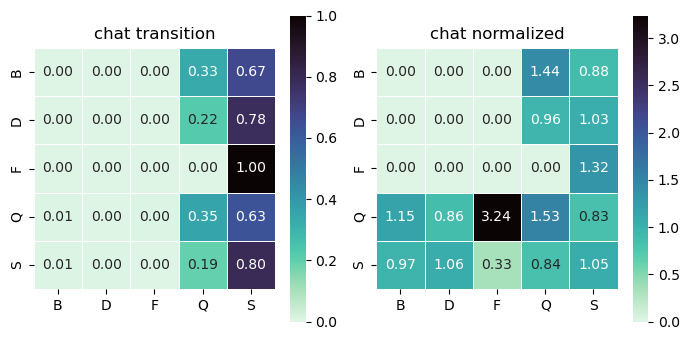

In [50]:
heatmaps(nek21_chat_df['labels_h'].copy(), title="chat")
#BQ=1.44
#QF=3.24

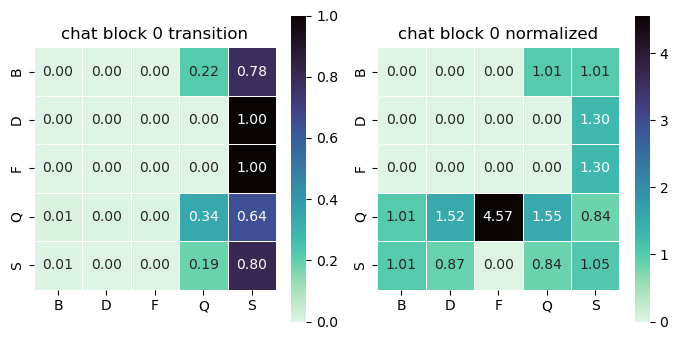

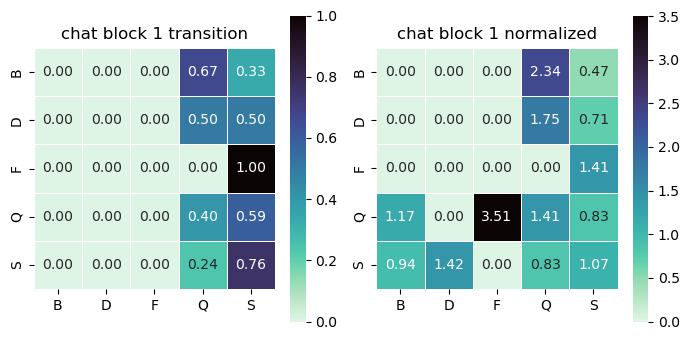

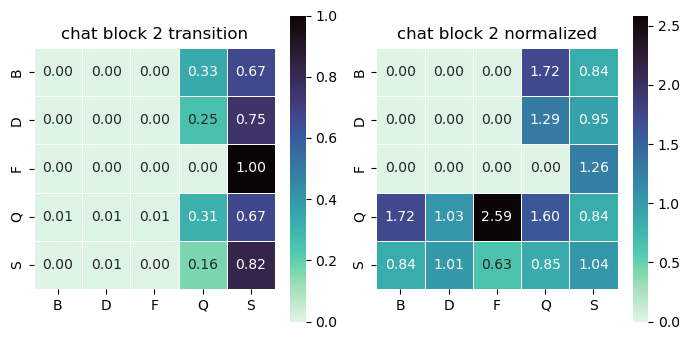

In [10]:
for i in range(0,len(nek21_chat_df['block'].unique())):
    df = nek21_chat_df[nek21_chat_df['block'] == i]
    heatmaps(df['labels_h'].copy(), title="chat block " + str(i))


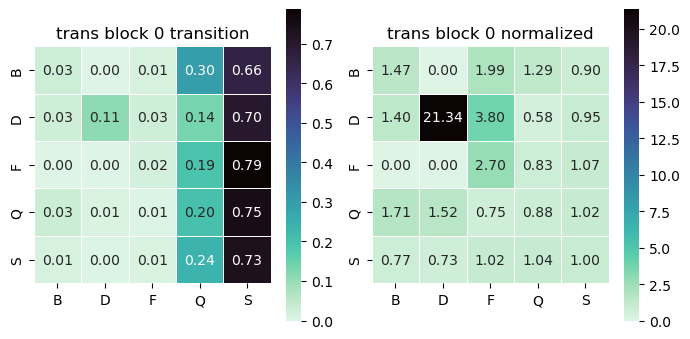

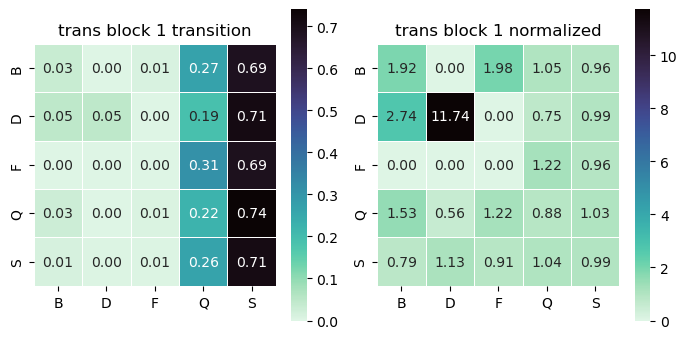

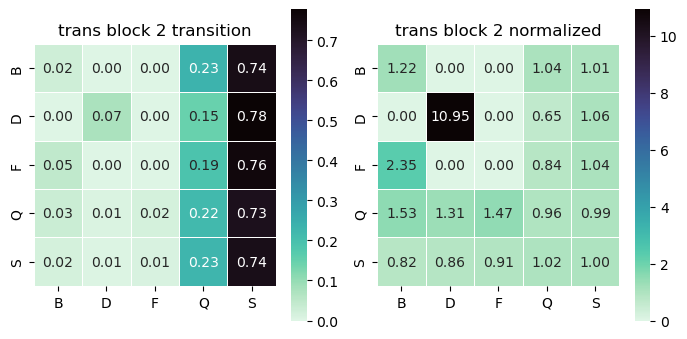

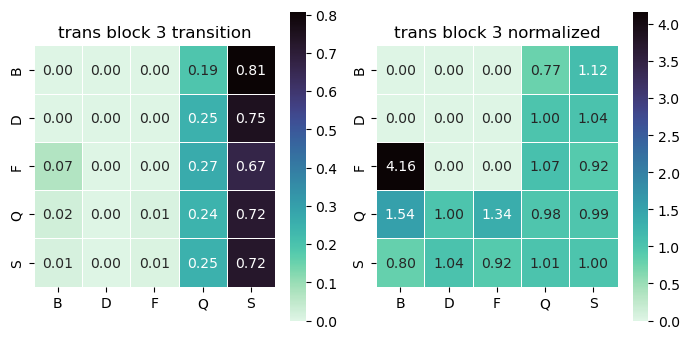

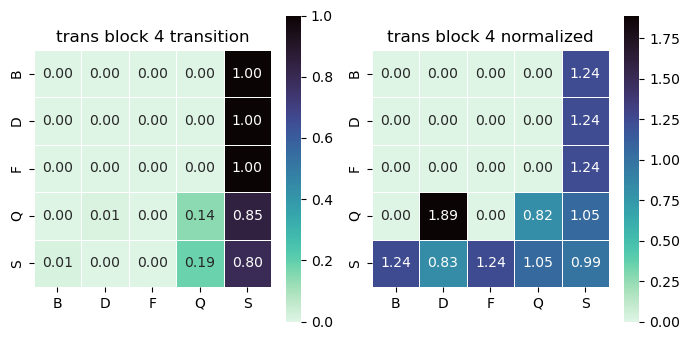

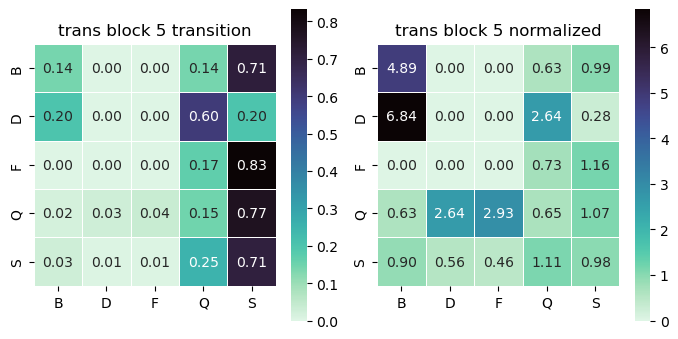

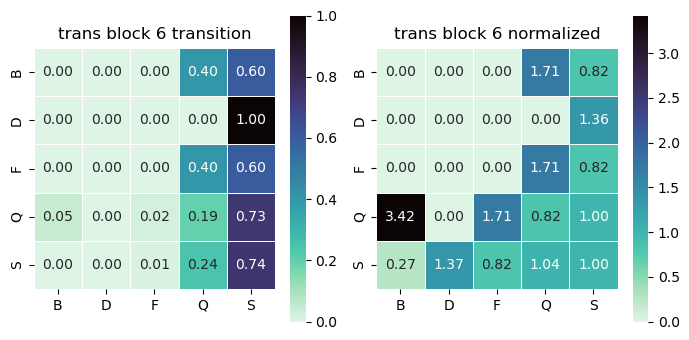

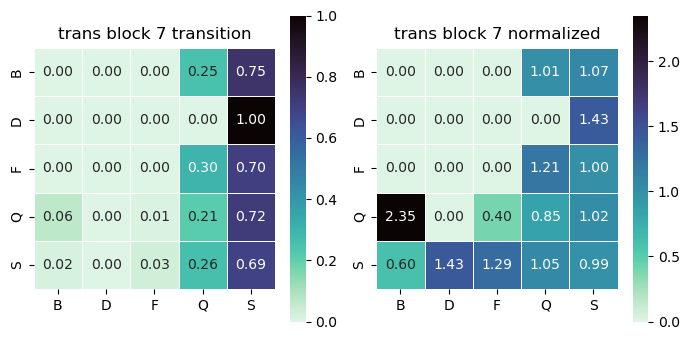

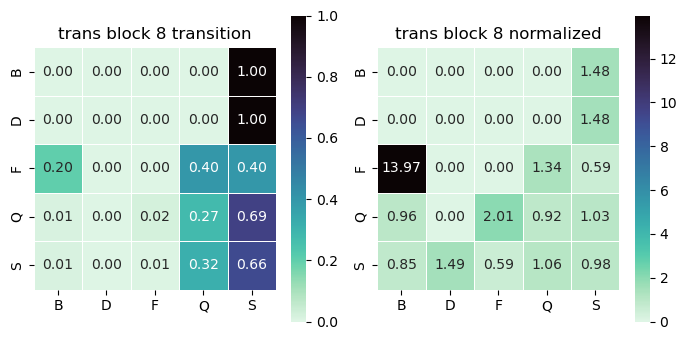

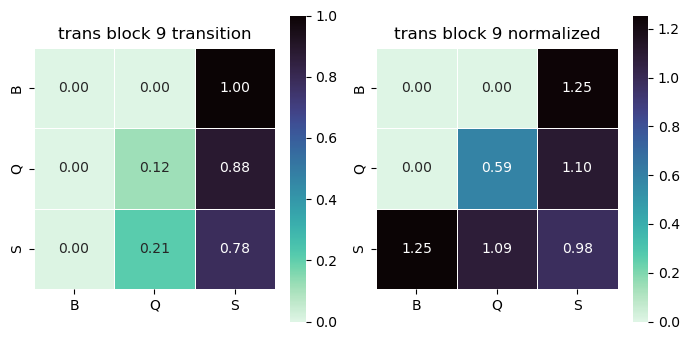

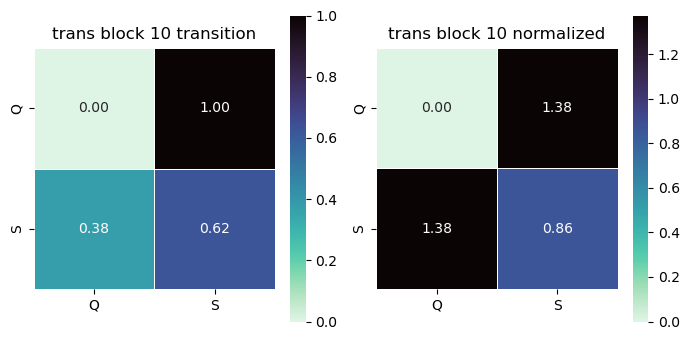

In [11]:
for i in range(0,len(nek21_trans_df['block'].unique())):
    df = nek21_trans_df[nek21_trans_df['block'] == i]
    heatmaps(df['labels_h'].copy(), title="trans block " + str(i))


In [ ]:
df = nek21_trans_df[nek21_trans_df['session']]

In [12]:
import math
tmp = nek21_trans_df['block']/(nek21_trans_df['block'].max()+1)*3
nek21_trans_df['time'] = tmp.apply(math.floor)

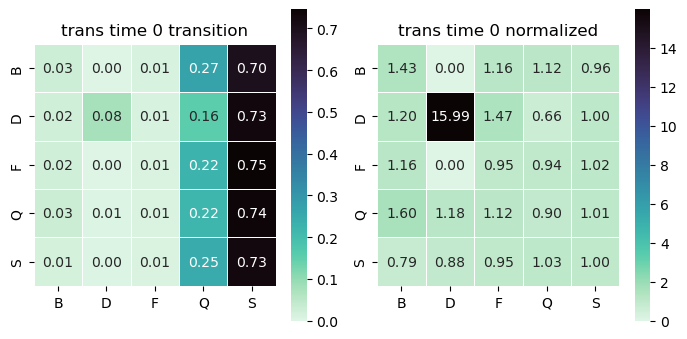

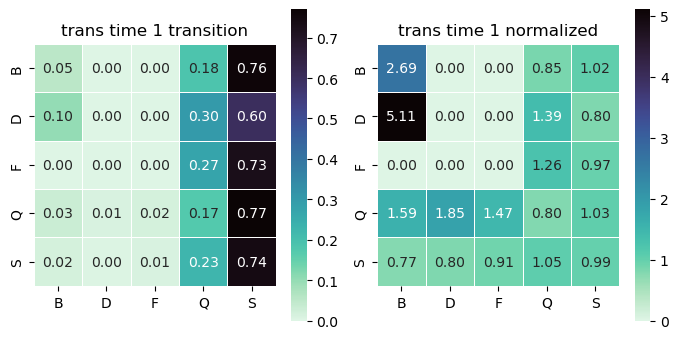

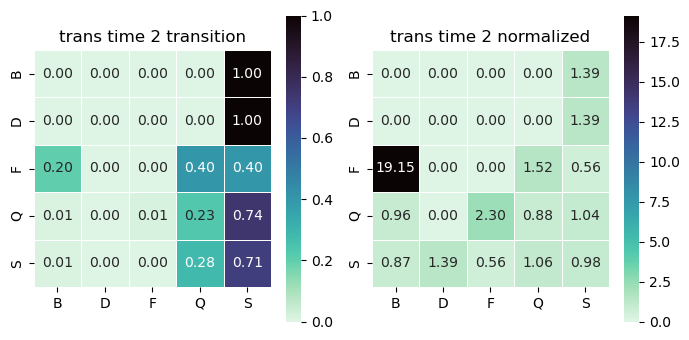

In [13]:

for i in range(0,len(nek21_trans_df['time'].unique())):
    df = nek21_trans_df[nek21_trans_df['time'] == i]
    heatmaps(df['labels_h'].copy(), title="trans time " + str(i))

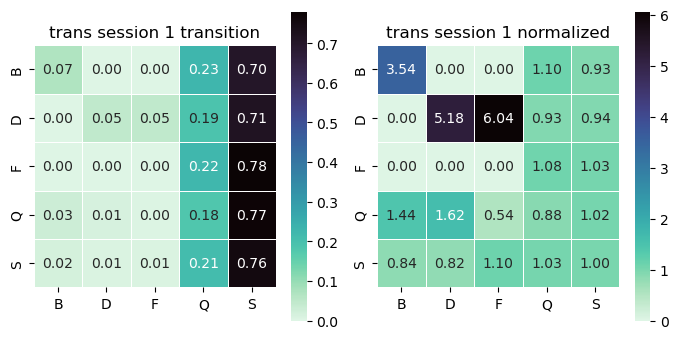

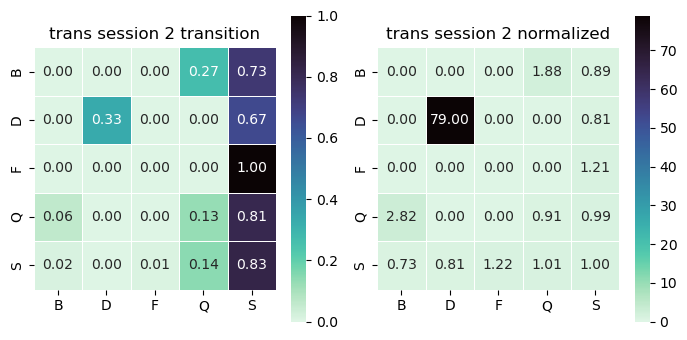

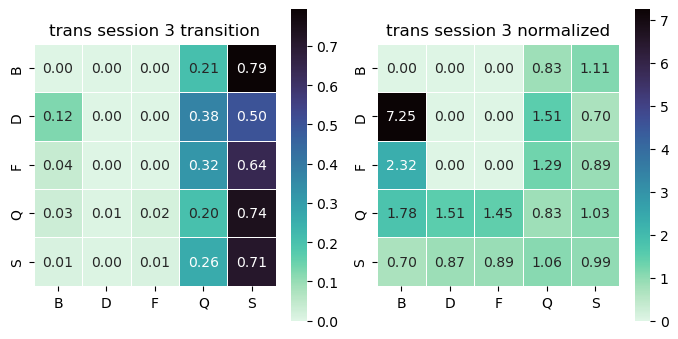

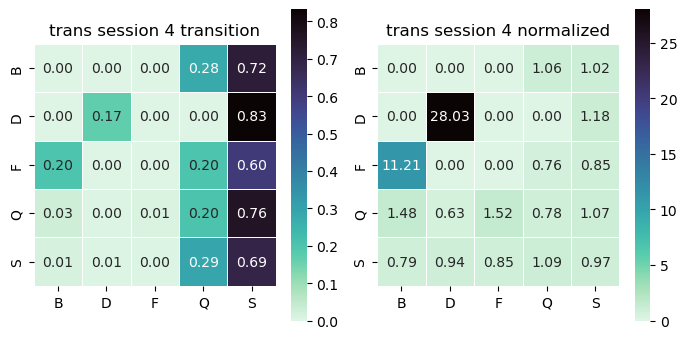

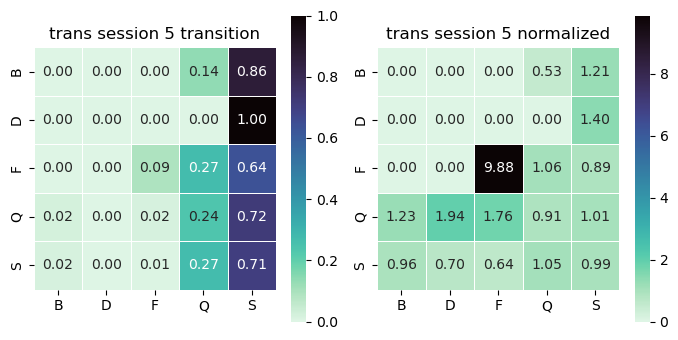

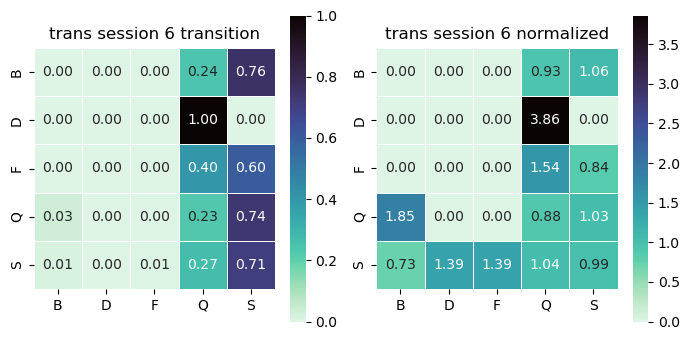

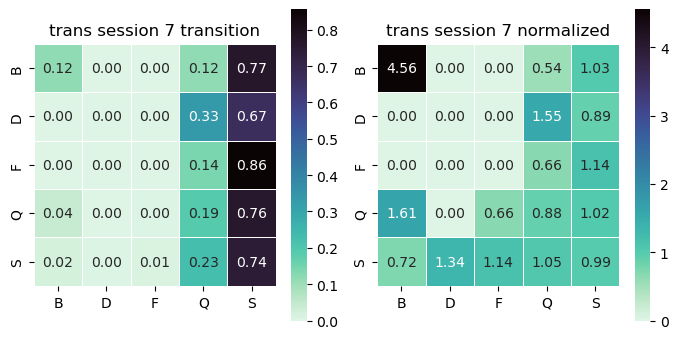

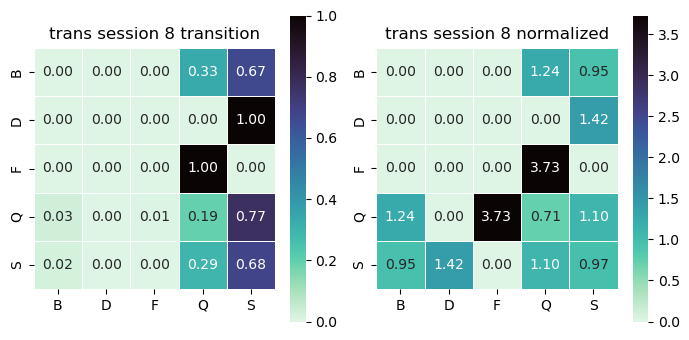

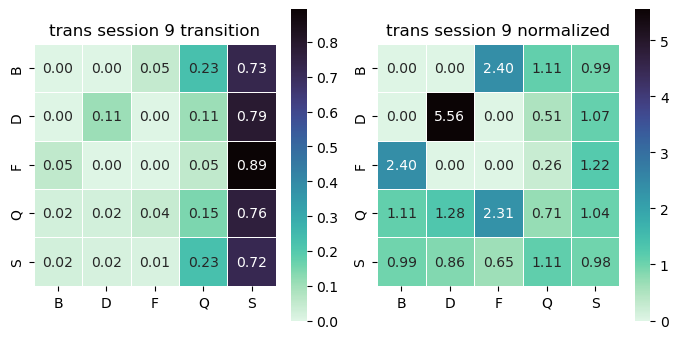

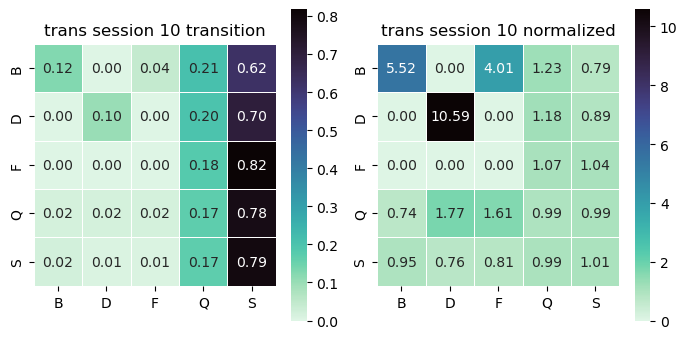

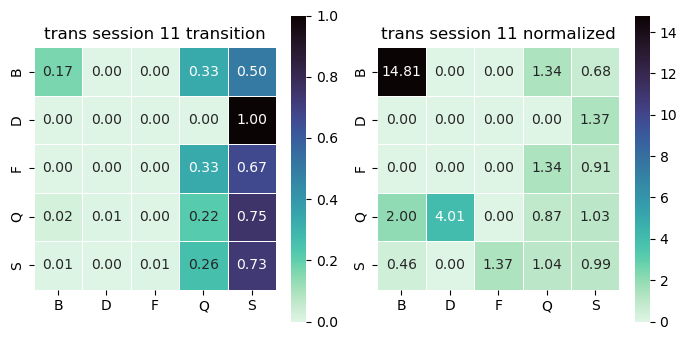

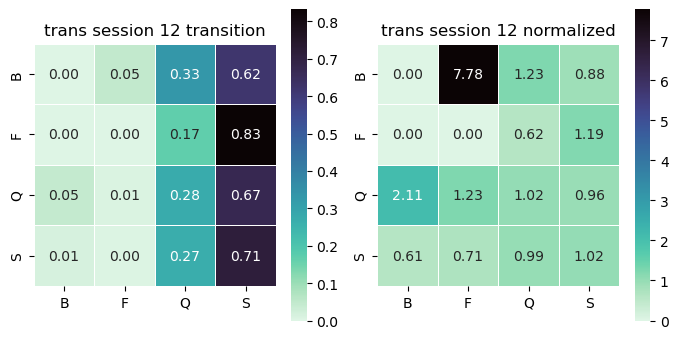

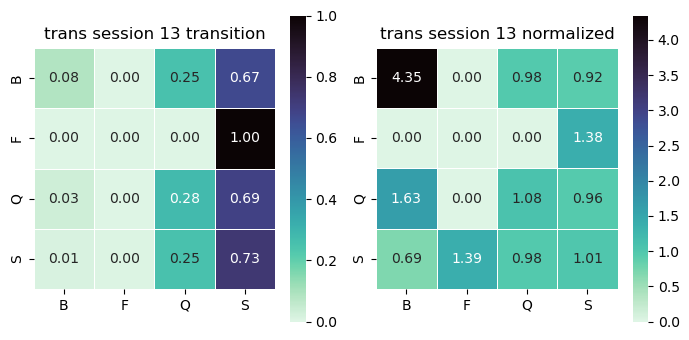

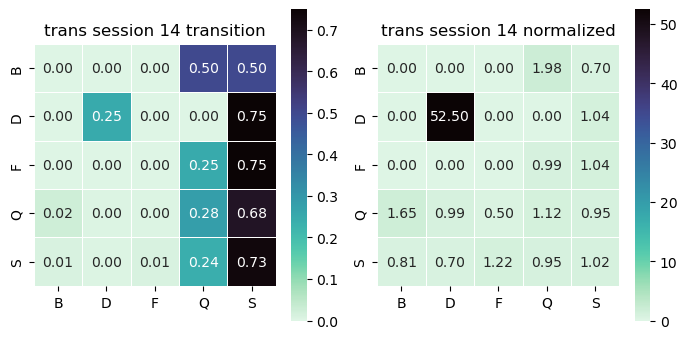

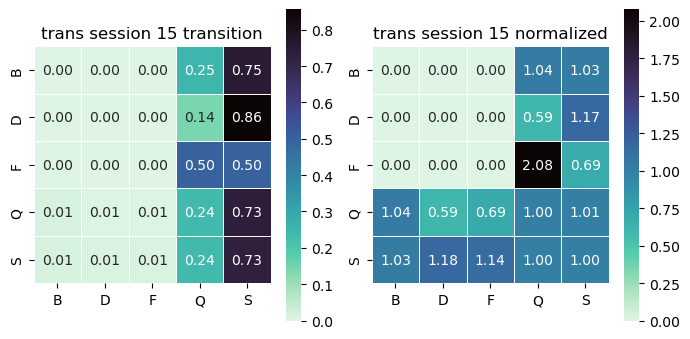

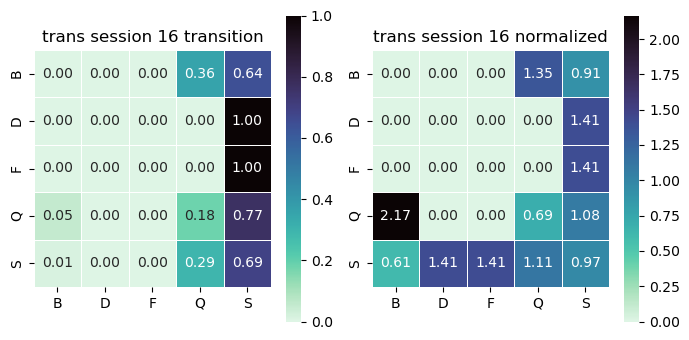

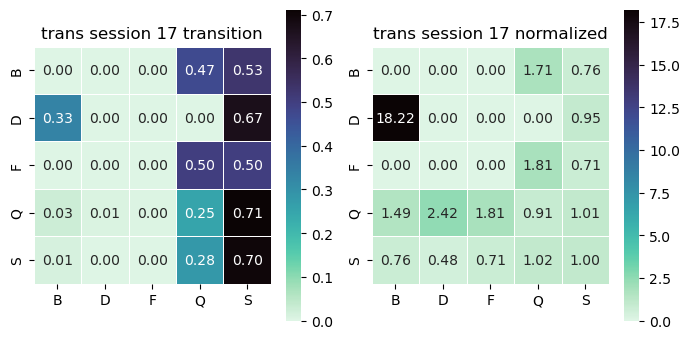

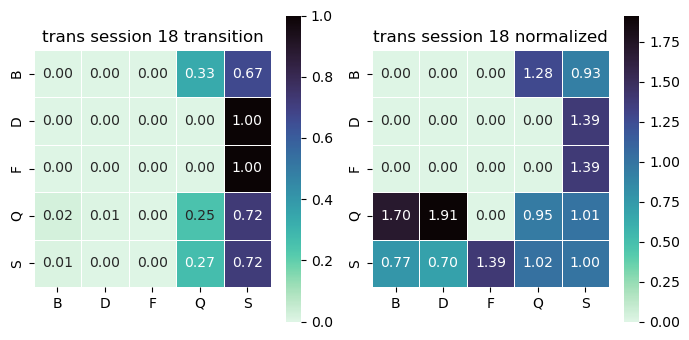

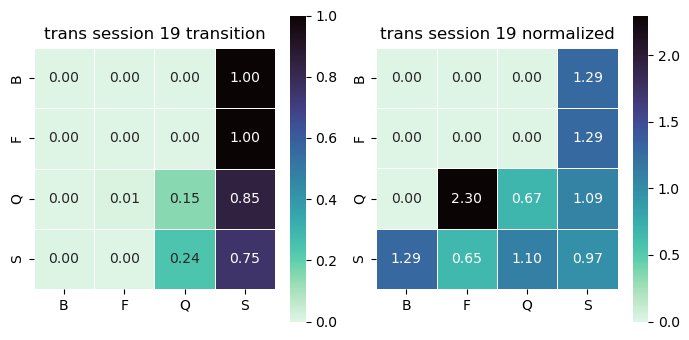

In [14]:
# trans by session

for i in range(1,len(nek21_trans_df['session'].unique())+1):
    df = nek21_trans_df[nek21_trans_df['session'] == i]
    heatmaps(df['labels_h'].copy(), title="trans session " + str(i))



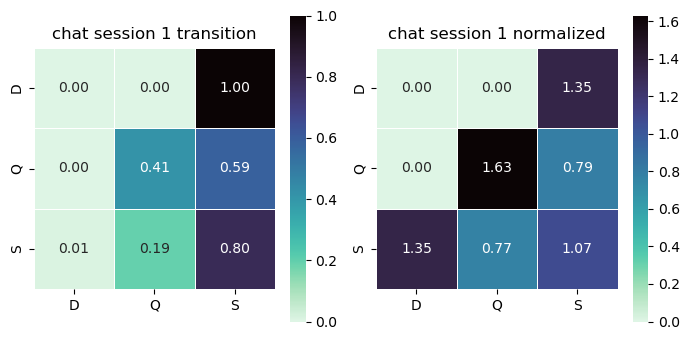

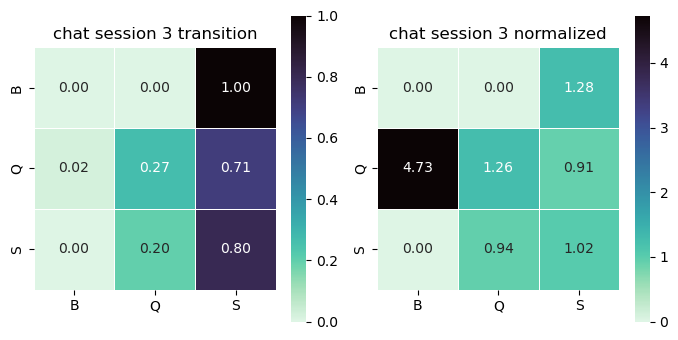

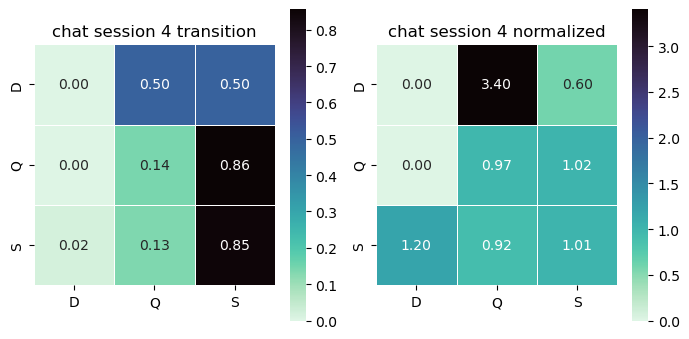

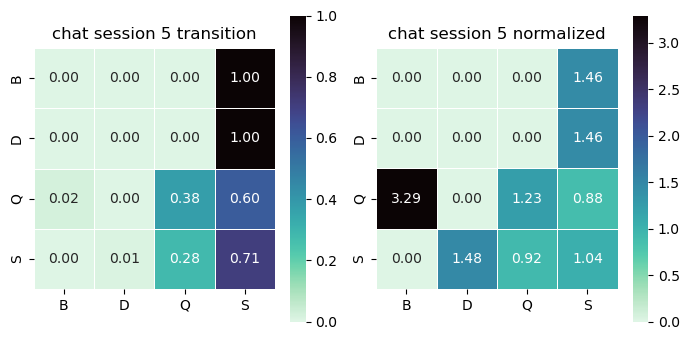

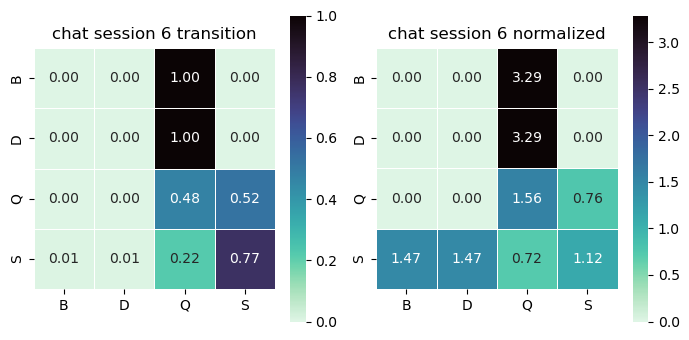

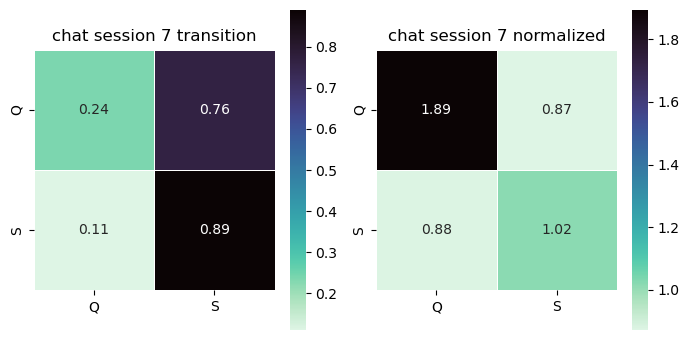

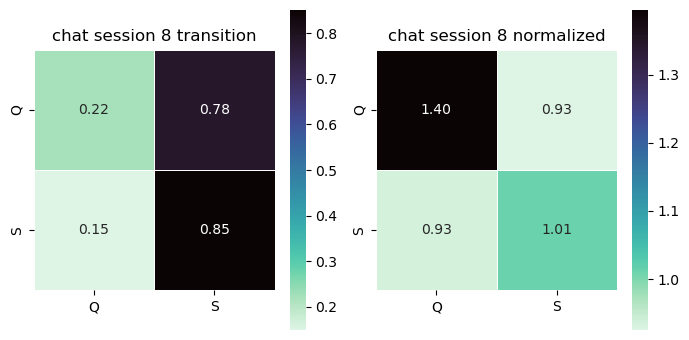

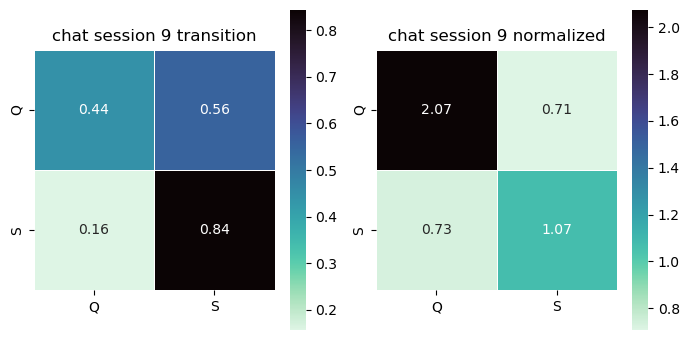

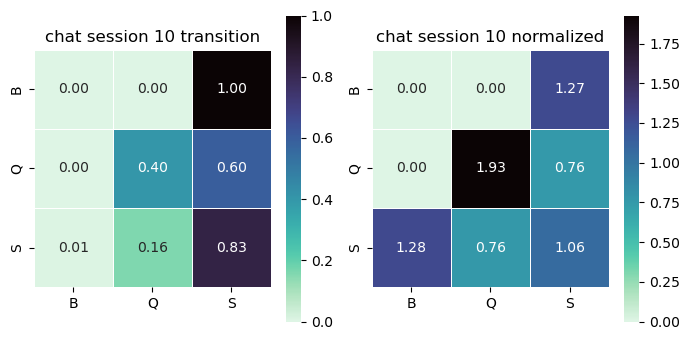

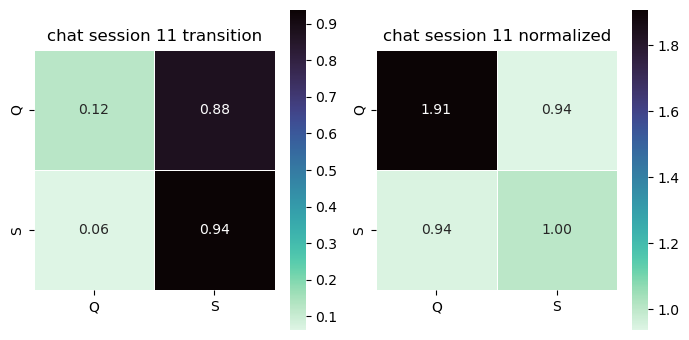

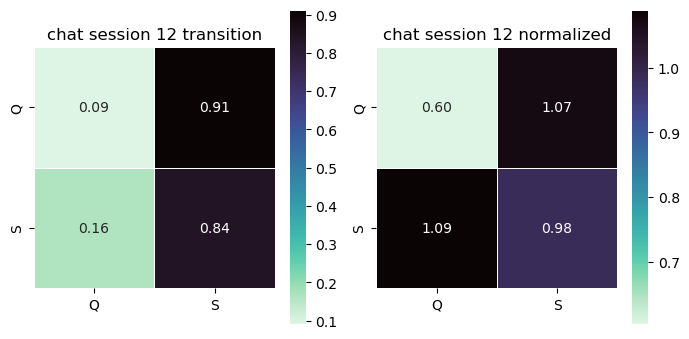

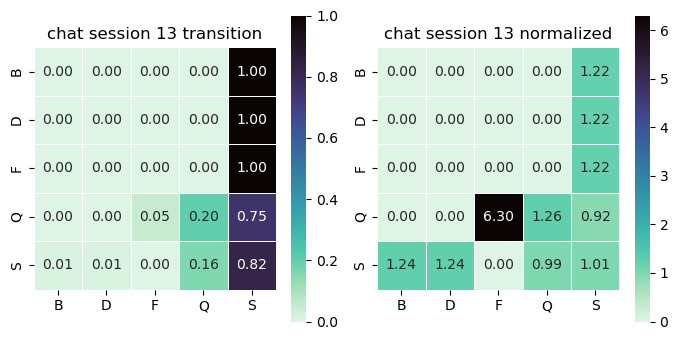

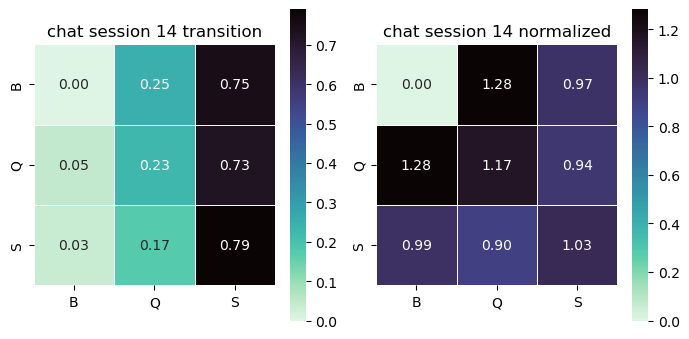

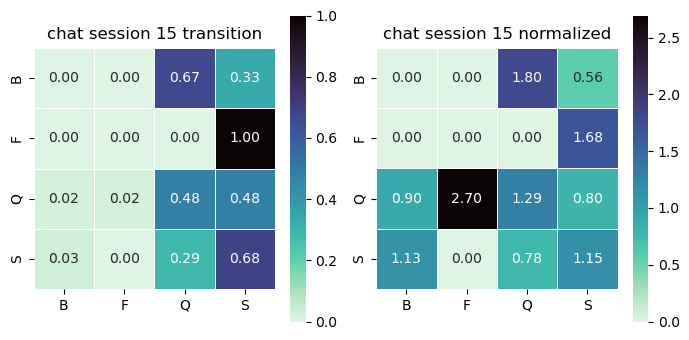

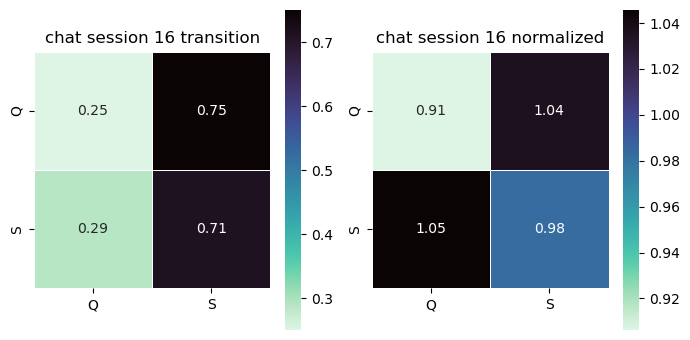

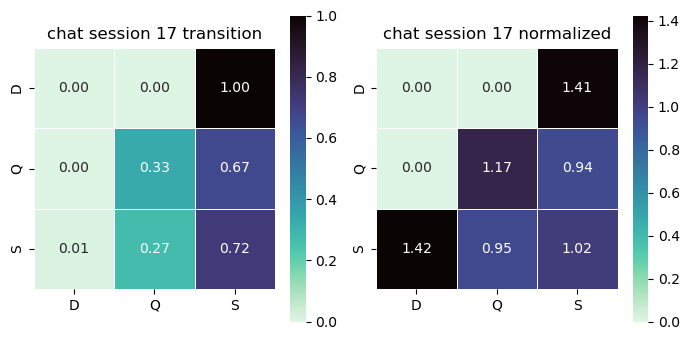

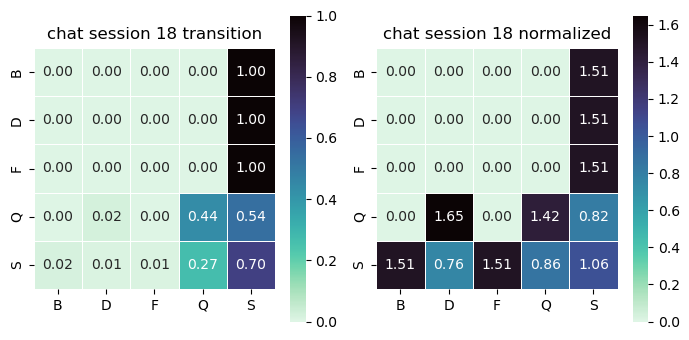

In [15]:
# chat by session
for i in range(1,len(nek21_chat_df['session'].unique())+1):
    if(i == 2):
        continue
    df = nek21_chat_df[nek21_chat_df['session'] == i]
    heatmaps(df['labels_h'].copy(), title="chat session " + str(i))